# Titanic - Machine Learning from Disaster

**D2APR: Aprendizado de Máquina e Reconhecimento de Padrões**

Especialização em Ciência de Dados - IFSP Campinas

Alunos
- Daniel Vargas Shimamoto
- Diego Machado de Assis

## 1. Informações Gerais


### 1.1. Contexto do problema
O naufrágio do Titanic é um dos naufrágios mais famosos da história.

Em 15 de abril de 1912, durante sua viagem inaugural, o considerado "inafundável" RMS Titanic afundou após colidir com um iceberg. Infelizmente, não havia botes salva-vidas suficientes para todos a bordo, resultando na morte de 1.502 dos 2.224 passageiros e tripulantes.

Embora houvesse algum elemento de sorte envolvido na sobrevivência, parece que alguns grupos de pessoas tinham mais probabilidade de sobreviver do que outros.

O desafio é construir um modelo preditivo de classificação que responda à seguinte pergunte: "Que tipo de pessoa tem mais probabilidade de sobreviver?" usando os atributos de casa um dos passageiros. Como métrica de validação, vamos utilizar a acurácia.

Esse problema faz parte de uma competição bastante famosa do [Kaggle](https://www.kaggle.com/c/titanic)

Fonte:
* [Titanic - Overview](https://www.kaggle.com/c/titanic/overview)


### 1.2. Conhecendo o dataset

O [Dataset](https://www.kaggle.com/c/titanic/data) está dividido entre treino e teste. Os dados de treino possuem 891 registros divididos em 12 colunas e os dados de teste 418 registros com 11 colunas. A coluna faltante nos dados de treino é  referente aos dados da variável dependente *Surviver*.

### 1.3. Principais atributos e seus tipos

Os dados de treino dos passageiros possuem 12 colunas

* PassengerId (int): Id do passageiro
* Survived (Binaria): Se o passageiro sobreviveu (0 = Não, 1 = Sim)
* Pclass (int): Classe do ticket (1 = 1ª classe (alto), 2 = 2ª classe (médio), 3 = 3ª classe (baixo))
* Name (string): Nome do passageiro
* Sex (string): Sexo do passageiro
* Age (float): Idade do passageiro em anos
* SibSp (int): Quantidade de irmãos ou companheiros a bordo do Titanic
* Parch (int): Quantidade de pais ou filhos a bordo do Titanic
* Ticket (string): Número do ticket
* Fare (float): Tarifa do passageiro
* Cabin (string): Número da cabine
* Embarked (string): Porto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton)


Algumas informações adicionais referente aos atributos
* A idade é fracionada se menor que 1. Se a idade foi estimada ela está na forma de XX.5
* Para a variável *SibSp* foram considerados irmãos as relações de irmão, irmã, meio-irmão e meia-irmã e para companheiro marido e mulher, de modo que noivos e amantes foram ignorados
* Para a variável *Parch* foram considerados como pais apenas mãe e pai e como filhos apenas filha, filho, enteado e enteada. Algumas crianças viajavam apenas com a baba, nesses casos o *Parch = 0*

### 1.4. Objetivo
O Objetivo desse estudo é verificar se é possível prever se passageiro sobreviveria ou não (*Surviver*) do acidente do Titanic com base nas suas características.

### 2. Pré-processamento

#### 2.1. Visão geral dos dados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importando os datasets
df_train = pd.read_csv('https://raw.githubusercontent.com/ciencia-dados-ifsp-grupo5/Titanic/main/Data/train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/ciencia-dados-ifsp-grupo5/Titanic/main/Data/test.csv')

#Tornando PassengerId como index
df_train.set_index('PassengerId', inplace = True)
df_test.set_index('PassengerId', inplace = True)

print(f'O dataset de treino possui {df_train.shape[0]} linhas e {df_train.shape[1]} colunas')
print(f'O dataset de teste possui {df_test.shape[0]} linhas e {df_test.shape[1]} colunas')

O dataset de treino possui 891 linhas e 11 colunas
O dataset de teste possui 418 linhas e 10 colunas


In [3]:
df_train.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
df_test.head(3)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


#### 2.2. Limpeza dos dados

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
# Dados nulos
print(f'O dataset possui {df_train.isnull().sum().sum()} valores Nulos')

O dataset possui 866 valores Nulos


In [7]:
# Dados duplicados
print(f'O dataset possui {df_train.duplicated().sum()} dados duplicados')

O dataset possui 0 dados duplicados


O Dataset de treino não possuem dados repetidos, porém existem 866 valores nulos, distribuidos nas colunas 
* Age: 177 dados nulos
* Cabin: 687 dados nulos
* Embarked:2 dados nulos

Esses dados serão tratados posteriormente

### 3. Análise exploratória

In [8]:
df_train.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [9]:
#Quantidade de valores para Survived
df_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [10]:
#Estatísticas descritivas
df_train[['Age','SibSp','Parch','Fare']].describe().round(2)

,Age,SibSp,Parch,Fare
count,714.00,891.00,891.00,891.00
mean,29.70,0.52,0.38,32.20
std,14.53,1.10,0.81,49.69
min,0.42,0.00,0.00,0.00
25%,20.12,0.00,0.00,7.91
50%,28.00,0.00,0.00,14.45
75%,38.00,1.00,0.00,31.00
max,80.00,8.00,6.00,512.33


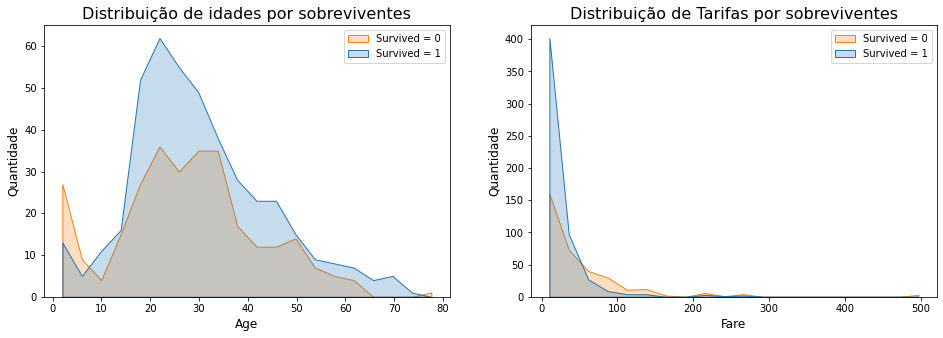

In [11]:
#Variáveis contínuas
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

#Gráfico de idade
sns.histplot(data = df_train,x = 'Age', hue = 'Survived', shrink=.8, ax=ax[0], element="poly", bins = 20)
ax[0].set_title('Distribuição de idades por sobreviventes', fontsize = 16)
ax[0].set_xlabel('Age',fontsize = 12)
ax[0].set_ylabel('Quantidade',fontsize = 12)
ax[0].legend(labels = ['Survived = 0','Survived = 1'],loc = 'upper right')

#Gráfico de Tarifas
sns.histplot(data = df_train,x = 'Fare', hue = 'Survived', shrink=.8, ax=ax[1], element="poly", bins = 20)
ax[1].set_title('Distribuição de Tarifas por sobreviventes', fontsize = 16)
ax[1].set_xlabel('Fare',fontsize = 12)
ax[1].set_ylabel('Quantidade',fontsize = 12)
ax[1].legend(labels = ['Survived = 0','Survived = 1'],loc = 'upper right')

plt.show()

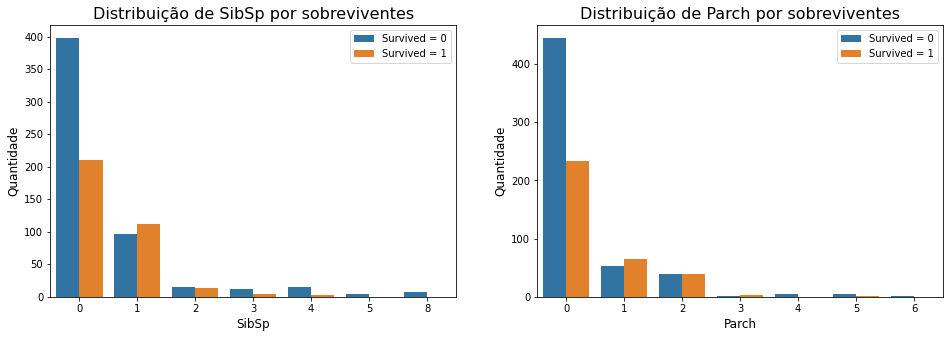

In [12]:
#Variáveis discretas
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

#Gráfico de SibSp
sns.countplot(data = df_train,x = 'SibSp', hue = 'Survived', ax=ax[0])
ax[0].set_title('Distribuição de SibSp por sobreviventes', fontsize = 16)
ax[0].set_xlabel('SibSp',fontsize = 12)
ax[0].set_ylabel('Quantidade',fontsize = 12)
ax[0].legend(labels = ['Survived = 0','Survived = 1'],loc = 'upper right')

#Gráfico de Parch
sns.countplot(data = df_train,x = 'Parch', hue = 'Survived', ax=ax[1])
ax[1].set_title('Distribuição de Parch por sobreviventes', fontsize = 16)
ax[1].set_xlabel('Parch',fontsize = 12)
ax[1].set_ylabel('Quantidade',fontsize = 12)
ax[1].legend(labels = ['Survived = 0','Survived = 1'],loc = 'upper right')

plt.show()

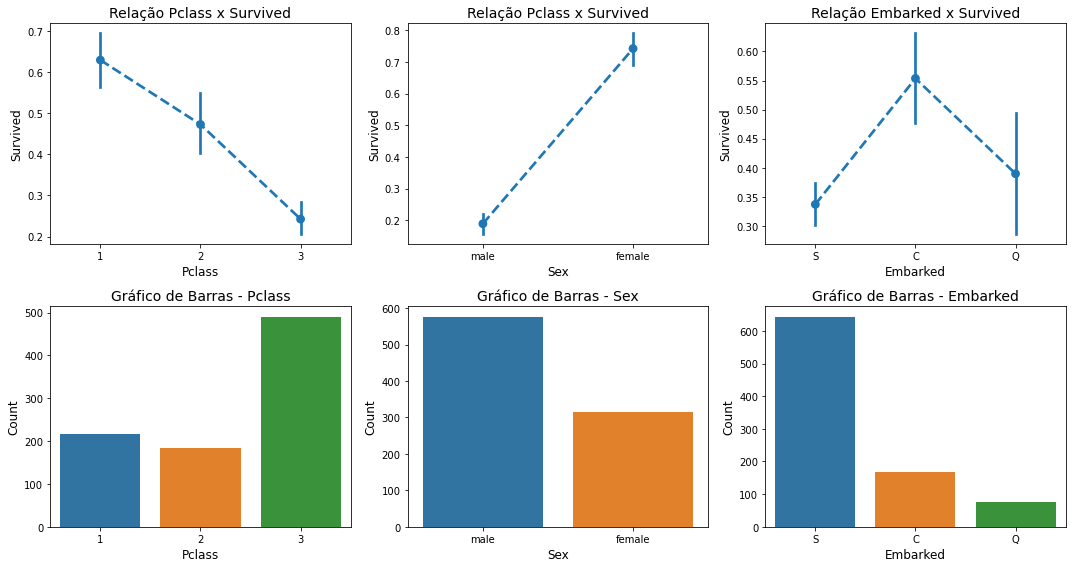

In [13]:
#Variáveis Categóricas
fig, ax = plt.subplots(2, 3, figsize=(15, 8))

# Gráfico de Pclass - Relação
sns.pointplot(x="Pclass", y="Survived",data=df_train, ax = ax[0,0], linestyles = '--')
ax[0,0].set_title('Relação Pclass x Survived', fontsize = 14)
ax[0,0].set_xlabel('Pclass',fontsize = 12)
ax[0,0].set_ylabel('Survived',fontsize = 12)

# Gráfico de Pclass - Barras
sns.countplot(x="Pclass",data=df_train, ax = ax[1,0])
ax[1,0].set_title('Gráfico de Barras - Pclass', fontsize = 14)
ax[1,0].set_xlabel('Pclass',fontsize = 12)
ax[1,0].set_ylabel('Count',fontsize = 12)

# Gráfico de Sex
sns.pointplot(x="Sex", y="Survived",data=df_train, ax = ax[0,1], linestyles = '--')
ax[0,1].set_title('Relação Pclass x Survived', fontsize = 14)
ax[0,1].set_xlabel('Sex',fontsize = 12)
ax[0,1].set_ylabel('Survived',fontsize = 12)

# Gráfico de Sex - Barras
sns.countplot(x="Sex",data=df_train, ax = ax[1,1])
ax[1,1].set_title('Gráfico de Barras - Sex', fontsize = 14)
ax[1,1].set_xlabel('Sex',fontsize = 12)
ax[1,1].set_ylabel('Count',fontsize = 12)

# Gráfico de Embarked
sns.pointplot(x="Embarked", y="Survived",data=df_train, ax = ax[0,2], linestyles = '--')
ax[0,2].set_title('Relação Embarked x Survived', fontsize = 14)
ax[0,2].set_xlabel('Embarked',fontsize = 12)
ax[0,2].set_ylabel('Survived',fontsize = 12)

# Gráfico de Embarked - Barras
sns.countplot(x="Embarked",data=df_train, ax = ax[1,2])
ax[1,2].set_title('Gráfico de Barras - Embarked', fontsize = 14)
ax[1,2].set_xlabel('Embarked',fontsize = 12)
ax[1,2].set_ylabel('Count',fontsize = 12)

plt.tight_layout()
plt.show()

<AxesSubplot:>

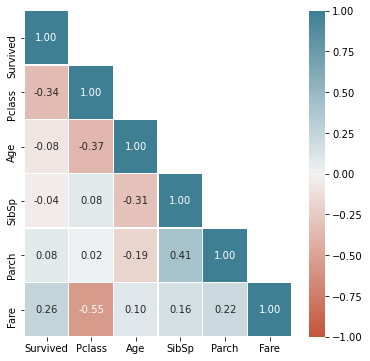

In [14]:
plt.figure(figsize=(6, 6))

mask = np.zeros_like(df_train.corr())
mask[np.triu_indices_from(mask, k=1)] = True

sns.heatmap(df_train.corr(), mask=mask, linewidths=.3, cmap=sns.diverging_palette(20, 220, as_cmap=True), vmin=-1, vmax=1, annot=True, fmt='.2f')

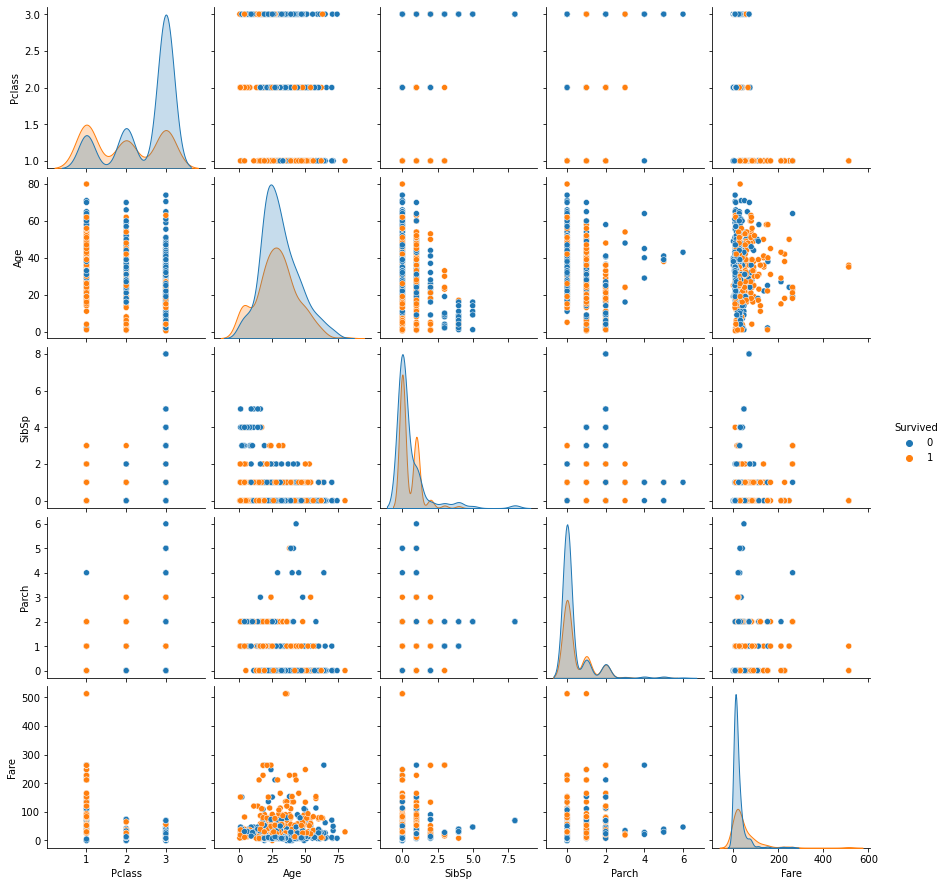

In [15]:
col_pairplot = ['Survived', 'Pclass','Sex', 'Age', 'SibSp','Parch', 'Fare']
sns.pairplot(df_train[col_pairplot], hue = 'Survived')

### Conclusão

#### Variáveis Contínuas:
* A distribuição de idade não parece ter uma forte relação com a variável alvo. Embora tenhamos um alto percentual de sobrevivente nas idades menores que 5 anos comparado com as demais idades, os demais dados mostram um comportamento mais homogêneo.

* A Correlação da variável *Fare* é de 0.26, indicando uma possível correlação fraca positiva. No gráfico de distribuição, temos que existe um ponto específico onde o número de sobrevivemtes passam os de não sobreviventes, podendo ser um indicativo de alguma separação dos dados

#### Variáveis Discretas
* As variáveis *SibSp* e *Parch* possuem um comportamento muito semelhante em relação à *Survived*, visualmente os casos em que os valores desses atributos são 0 possuem um volume de não sobreviventes superior aos demais, podendo ser um indicio que ter um "conhecido" dentro do navio aumenta as chances de sobreviver

#### Variáveis Categóricas
* A variável *Pclass* possui a maior correlação com a variável alvo (-0.34), podendo indicicar que o aumento da classe da passagem diminui a chance do passageiro não sobreviver. Essa variável também possui uma correlação com *Fare* (-0.55), sendo um indicio que elas podem adicionar uma multicolinearidade ao modelo se usadas em conjunto. 

* O volume de homens na base é superior ao de mulheres, porém o percentual de sobreviventes do sexo feminino é muito superior ao dos homens. Essa variável será transformada em uma variável binária para ser adicionada ao modelo futuramente

* Embora no gráfico de relação entre *Embarked x Survive* tenha-se uma distinção visual da influência do porto na variável dependente, o volume das amostras está bem desbalanceado.

### 4. Pipeline de pré-processamento

Durante a análise exploratória algumas variáveis não forneceram nenhuma informação adicional aos dados (*Name*,*Ticket*,*Cabin*) e portanto serão excluidas do modelo. O atributo *Age* também não será utilizado pois não acrescentou muitas informações aos dados, além de possuir muitos dados vazios.

A variável *Embarked* possui alguns valores nulos e será preenchida com o valor mais frequente. Além disso, essa variável será transformada pelo *OneHotEncoder* para transformar seus valores em colunas binárias.

Embora as variáveis númericas (*Fare*, *Parch* e *SibSp*) não possuam valores faltantes, será feita uma verificação caso apareça algum valor pendente para preenchecer com o valor mais frequente, além disso os dados serão normalizadas por meio da função *StandardScaler*

Por fim, *Sex* será transformada em uma coluna binária para facilitar o treinamento dos modelos.

Para realizar todas esses pré-processamento usaremos o *Pipeline* e *Column Transformer* do *Sklearn* para encapsular todas essas transformações

In [16]:
# Bibliotecas
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Separação dos atributos
numerical_attributes = ['Fare','Parch','SibSp']
categorical_attributes = ['Embarked','Pclass']
binary_attributes = ['Sex']
drop_attributes = ['Name', 'Ticket','Cabin','Age']

# Pipeline para "variáveis categóricas"
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('one-hot-encoding', OneHotEncoder(handle_unknown='ignore'))])

# Pipeline para "numéricos"
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scale_numerical', StandardScaler())])

# Pipeline geral
prep_pipeline = ColumnTransformer([
    ('pipeline_numerical', numerical_pipeline, numerical_attributes),
    ('encode_categorical', categorical_pipeline, categorical_attributes),
    ('binary_feat', OneHotEncoder(drop='first'), binary_attributes),
    ('drop_features', 'drop', drop_attributes),],
    remainder='drop')

### 5. Modelos de Aprendizado de Máquina

#### 5.1. Preparação dos dados

Separando as variáveis e aplicando o pré-processamento

In [17]:
# Divisão da base de treino entre features e target
df_train_feature = df_train.drop(columns = ['Survived'])
df_train_target = df_train['Survived'].values
df_train_feature.head(3)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [18]:
df_train_pre = prep_pipeline.fit_transform(df_train_feature)

df_test_pre = prep_pipeline.fit_transform(df_test)

print(f'Dados Treino: {df_train_pre.shape}')
print(f'Dados Teste: {df_test_pre.shape}')

Dados Treino: (891, 10)
Dados Teste: (418, 10)


In [19]:
df_train_pre[0]

array([-0.50244517, -0.47367361,  0.43279337,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  1.        ,  1.        ])

#### 5.2. Treinamento dos modelos

Para todos os modelos vamos utilizar  o [*GridSearchCV*](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html), de modo a procurar os melhores parâmetros e realizar a validação cruzada para verificar as métricas de avaliação com 5 folds

##### 5.2.1. Modelo 1 - KNeighborsClassifier

O primeiro modelo a ser utilizado será o [*KNeighborsClassifier*](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). Vamos testar os seguintes parametros: 

* **n_neighbors**: Número de vizinhos usados - 5, 10, 15, 20, 25, 30
* **weights**: Função de peso usada para previsão - uniforme (pesos uniformes), distance (peso é o inverso da distância)
* **metric**: Métrica de distância - Euclidiana, Manhattan, Minkowski

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

num_folds = 5

KNN_grid_params = {'n_neighbors': [5,10,15,20,25,30], 
                   'weights': ['uniform', 'distance'], 
                   'metric': ['euclidean', 'manhattan','minkowski']}

KNN_model = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = KNN_grid_params, cv=num_folds, scoring= "accuracy")

KNN_model.fit(df_train_pre,df_train_target)

KNN_best_params = KNN_model.best_params_
KNN_accuracy = KNN_model.best_score_

print(f'Melhores parametros: {KNN_best_params}')
print(f'Acurácia: {KNN_accuracy}')

Melhores parametros: {'metric': 'manhattan', 'n_neighbors': 30, 'weights': 'distance'}
Acurácia: 0.8036281463812692


In [21]:
knn_final_model = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 30, weights =  'distance')
knn_final_model.fit(df_train_pre,df_train_target)
print(f'Score de Treino: {knn_final_model.score(df_train_pre,df_train_target)}')

knn_predict = knn_final_model.predict(df_test_pre)
knn_teste = pd.DataFrame({'PassengerId':df_test.index, 'Survived':knn_predict})
knn_teste.to_csv('knn_submission_teste.csv', index = False)

Score de Treino: 0.9248035914702581


##### 5.3.2. Modelo 2 - LogisticRegression

Para o modelo de [Regressão Logística](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) serão testados os seguintes parâmetros

* C: Inverso da força de regularização - 0.001, 0.01, 0.1, 1, 10, 100
* penalty: Norma de penalidade - none, l1, l2, elasticnet


In [22]:
from sklearn.linear_model import LogisticRegression

num_folds = 5

LR_grid_params = {'C':np.logspace(-3,2,6), 
                   'penalty': ['none','l2','l1','elasticnet']}

LR_model = GridSearchCV(estimator = LogisticRegression(random_state = 42), param_grid = LR_grid_params, cv=num_folds, scoring= "accuracy")

LR_model.fit(df_train_pre,df_train_target)

LR_best_params = LR_model.best_params_
LR_accuracy = LR_model.best_score_

print(f'Melhores parametros: {LR_best_params}')
print(f'Acurácia: {LR_accuracy}')

Melhores parametros: {'C': 0.1, 'penalty': 'l2'}
Acurácia: 0.7923859142552256


In [23]:
lr_final_model = LogisticRegression(C = 0.1, penalty = 'l2', random_state = 42)
lr_final_model.fit(df_train_pre,df_train_target)
print(f'Score de Treino: {lr_final_model.score(df_train_pre,df_train_target)}')

lr_predict = lr_final_model.predict(df_test_pre)
lr_teste = pd.DataFrame({'PassengerId':df_test.index, 'Survived':lr_predict})
lr_teste.to_csv('lr_submission_teste.csv', index = False)

Score de Treino: 0.7991021324354658


##### 5.3.3. Modelo 3 - DecisionTreeClassifier

Para o modelo [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) serão testados os seguintes parâmetros

* criterion: função que defini a qualidade da divisão - gini (impureza de Gini), entropy (ganho de informação)
* splitter: estratégia usada para escolher a divisão em casa nó - best, random
* max_depth: profundidade máxima da árvore de decisão - range(2,5),
* min_samples_split: número mínimo de registros necessários para a divisão de um nó interno da árvore - range(5,10)
* min_samples_leaf: número de variáveis considerado para se analisar a melhor divisão de um nó - range(3,10)
* max_features: auto, sqrt, log2

In [24]:
from sklearn.tree import DecisionTreeClassifier

num_folds = 5

DTC_grid_params = {'criterion':['gini','entropy'],
                   'splitter':['best', 'random'],
                   'max_depth': range(2,5),
                   'min_samples_split': range(5,10),
                   'min_samples_leaf': range(3,10),
                   'max_features':['auto', 'sqrt', 'log2']}

DTC_model = GridSearchCV(estimator = DecisionTreeClassifier(random_state = 42), param_grid = DTC_grid_params, cv=num_folds, scoring= "accuracy")

DTC_model.fit(df_train_pre,df_train_target)

DTC_best_params = DTC_model.best_params_
DTC_accuracy = DTC_model.best_score_

print(f'Melhores parametros: {DTC_best_params}')
print(f'Acurácia: {DTC_accuracy}')

Melhores parametros: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 5, 'splitter': 'random'}
Acurácia: 0.8035842068922227


In [25]:
dtc_final_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 3,
                                         max_features = 'auto', min_samples_leaf = 3, 
                                         min_samples_split = 5, splitter = 'random', random_state = 42)

dtc_final_model.fit(df_train_pre,df_train_target)
print(f'Score de Treino: {dtc_final_model.score(df_train_pre,df_train_target)}')

dtc_predict = dtc_final_model.predict(df_test_pre)
dtc_teste = pd.DataFrame({'PassengerId':df_test.index, 'Survived':dtc_predict})
dtc_teste.to_csv('dtc_submission_teste.csv', index = False)

Score de Treino: 0.8035914702581369


#### 5.4. Avaliação dos modelos

Os três modelo foram submetidos na competição:

##### 5.4.1. KNN
![](../Image/knn_results.png)

##### 5.4.2. LogisticRegression
![](../Image/lr_results.png)

##### 5.4.3. DecisionTreeClassifier
![](../Image/dtc_results.png)

### 6. Conclusão

#### 6.1. Discussão dos resultados

Embora o modelo KNN obteve a melhor acurácia nos dados de treino (0.924), seu resultado na base de teste não foi o melhor, podendo ser um indício de overfitting nos dados. 
O DecisionTreeClassifier apresentou o melhor resultado em relação aos dados de teste (0.770) e a acurácia de treino e teste ficou muito próxima (treino: 0.804 vs teste: 0.770). 
A Regressão logística teve um comportamente parecido com o DecisionTreeClassifier mas os resultados foram levemente inferiores.

#### 6.2. Próximos passos

Os modelos apresentaram uma boa acurácia frente aos dados de testes, mas existem alguns caminhos que podem ser seguidos para aumentar esse valor:
* Criação de novas *features* a partir dos dados (Ex: agrupar as variáveis *SibSp* e *Parch* criando categorias que agrupam os valores)
* Tester outros modelos de machine learning (Ex:XGBoost, AdaBoostClassifier, SGDClassifer)
* Testar diferentes combinações de *features*